In [12]:
%matplotlib widget
import pyslim, msprime, tskit, random, math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, display

#load tree sequence file, recapitate/mutate if desired
#not recapitating now because that makes tree roots inaccessible individual-wise

ts = pyslim.load("/Users/alexanderwhitwam/Dropbox/university/research/space-trees/alex/disp.trees")
#ts = ts.recapitate(recombination_rate = 1e-8, Ne=500)
#ts = pyslim.SlimTreeSequence(msprime.mutate(ts, rate=1e-7))

In [13]:
samps = random.sample(sorted(ts.individuals_alive_at(0)), 5)
snodes = []
for i in samps:
    snodes.append(ts.individuals()[i].nodes[0])
    snodes.append(ts.individuals()[i].nodes[1])
sts = ts.simplify(snodes, keep_unary = False, keep_input_roots = True)

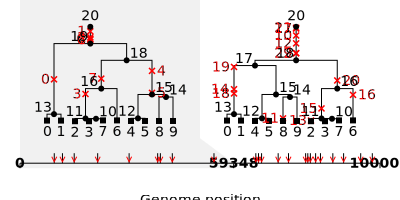

In [14]:
SVG(sts.draw_svg())

In [15]:
print(ts.mutation(0).metadata['mutation_list'][0]['selection_coeff'])

-0.011751007288694382


In [16]:
for var in sts.variants(isolated_as_missing=False):
    print(var.site.mutations[0].metadata)
    break

{'mutation_list': [{'mutation_type': 1, 'selection_coeff': -0.011898556724190712, 'subpopulation': 1, 'slim_time': 1111, 'nucleotide': -1}]}


In [19]:
def movingmuts(ts):
    dist, muts, mis = [], [], []
    for i in range(ts.num_individuals):
        mis.append(0)
    for var in sts.variants(samples=range(sts.num_nodes), isolated_as_missing=False):
        for i in range(sts.num_nodes):
            if var.genotypes[i] == 1:
                char = sts.node(i).individual
                if char != -1:
                    for mut in var.site.mutations:
                        mis[char] += mut.metadata['mutation_list'][0]['selection_coeff']

    for i in ts.individuals_alive_at(0):
        loc = ts.individual(i).location
        if loc[0] < 0.5:
            loc[0] = 0.5
        if loc[1] < 0.5:
            loc[1] = 0.5
        d = math.sqrt((loc[0] - 0.5)**2 + (loc[1] - 0.5)**2)
        m = mis[i]
        if m != 0:
            dist.append(d)
            muts.append(m)
    fig = plt.figure()
    plt.scatter(dist, muts, color="blue", s=5.0) 

In [20]:
movingmuts(sts)
movingmuts(ts)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
axes = [0, 1, 2]
colors = ["red", "green", "blue"]
times = [100, 200, 300]

for ax, color, time in zip(axes, colors, times):
    print(ax, color, time)

0 red 100
1 green 200
2 blue 300
